In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import os

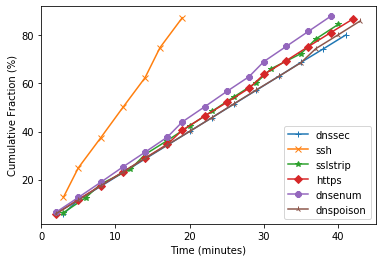

In [19]:
#Scanning Performance
PATH = '/home/snape/exitmap/src/analysis/performance' # Use your path
### Fetch all files in path
fileNames = os.listdir(PATH)
fileNames = [file for file in fileNames if '.csv' in file]
markers = ["+","x","*","D","8","2"]
### Loop over all files
for file,marker in zip(fileNames,markers):
    ### Read .csv file and append to list
    df = pd.read_csv(PATH + file, index_col = 0)
    ### Create line for every file
#     plt.xlabel("Time (s)")\
    label = file.split(".")[0]
    plt.plot(df,label=label,marker=marker)
    plt.ylabel('Cumulative Fraction (%)')
    plt.xlabel('Time (minutes)')
    plt.legend()
plt.show()


In [6]:
#DNS Resolvers of exit relays
df = pd.read_csv('/home/snape/exitmap/src/analysis/resolvers/exit_resolvers.csv')

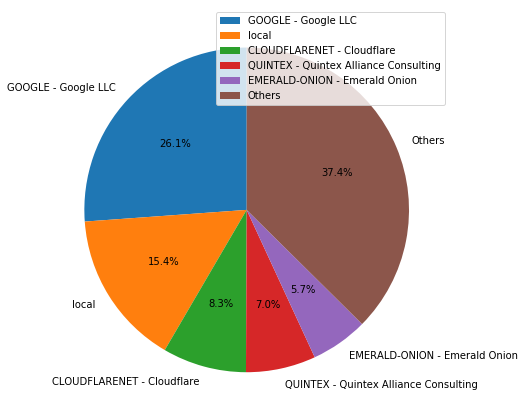

In [44]:
#DNS resolver company of exit relays
total = df.count()[0]
df['count'] = 0
companies = df.groupby('company').count()[['count']]
# companies['total'] = total
# companies['percentage'] =  (companies['count']/companies['total'] ) * 100
sorted_companies = companies.sort_values('count',ascending = False)[['count']]
top_five_companies, other_companies = sorted_companies[:5],sorted_companies[5:]
top_five_companies.loc['Others'] = other_companies.sum()
over_view_companies = top_five_companies

plt.figure(figsize=(16,8))
plt.title('DNS resolver company of exit relays')
ax1 = plt.subplot(121, aspect='equal')
ax1.pie(over_view_companies['count'], labels=over_view_companies.index.values, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.legend()
# df.plot(kind='pie', y = 'count', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, labels=list(over_view_companies.index.values), legend = False, fontsize=14)


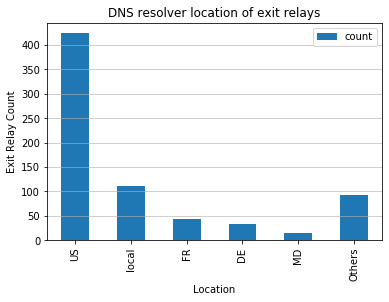

In [39]:
#DNS resolver location of exit relays

df['count'] = 0
locations = df.groupby('location').count()[['count']]
sorted_locations = locations.sort_values('count',ascending = False)[['count']]
top_five_locations, other_locations = sorted_locations[:5],sorted_locations[5:]
top_five_locations.loc['Others'] = other_locations.sum()
over_view_locations = top_five_locations
over_view_locations

over_view_locations.plot(kind='bar')
plt.title('DNS resolver location of exit relays')
plt.xlabel('Location')
plt.ylabel('Exit Relay Count')
plt.grid(axis='y', alpha=0.75)
plt.legend()

In [ ]:
#DNSSEC failure rate (maybe also anaylsis their locations or whatever)